# Basics of enhanced stereochemistry

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 350,300
IPythonConsole.drawOptions.addStereoAnnotation = True
from rdkit.Chem import Draw
import rdkit
print(rdkit.__version__)

2023.09.2


Let's start with four versions of a molecule with a single chiral center (alanine):

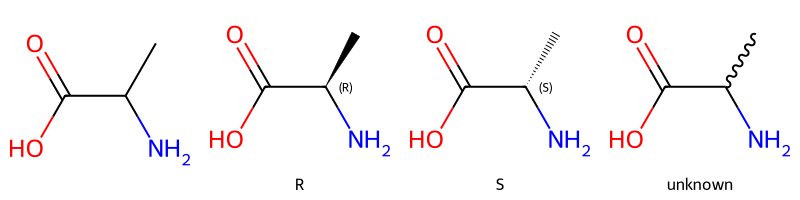

In [2]:
m = Chem.MolFromSmiles('NC(C)C(=O)O')
m_ccw = Chem.MolFromSmiles('N[C@H](C)C(=O)O')
m_cw = Chem.MolFromSmiles('N[C@@H](C)C(=O)O')
m_unk = Chem.MolFromSmiles('N[C@@H](C)C(=O)O |w:1.1|')
Chem.ReapplyMolBlockWedging(m_unk)
Draw.MolsToGridImage([m,m_ccw,m_cw,m_unk],legends=['','R','S','unknown'],molsPerRow=4)

Understanding what is meant by the second two SMILES is straightforward: in each case we're dealing with a single stereoisomer. The last molecule is also reasonably clear: by providing a squiggle (or wavy) bond to one of the neighbors of the chiral center we have been explicit that we don't know its stereochemistry. 

> *Note* that being explicit about what we don't know by providing the squiggle bond requires us to use CXSMILES, an extension to SMILES developed by ChemAxon.

But what does the first SMILES mean? Here no information is provided about stereochemistry, so we have to either guess or assume some convention like "unspecified chiral centers indicate a 50/50 mixture of the two possible local chiralities". This is fine if we produce all of the SMILES that we need to work with and either never provide SMILES to anyone else or let them know about our conventions, but both of those are pretty strong assumptions/requirements.

Fortunately we can do better than this by taking advantage of stereo groups, a.k.a. enhanced stereochemistry. This was introduced, I believe (the horrors of link rot and the modern internet makes it hard to be sure), by the team at MDL Information Systems back at the beginning of the '00s. It's supported in V3000 Mol/SDF files as well as CXSMILES.

> *Aside* While writing this post I ran across a nice [blog post](https://www.acdlabs.com/blog/enhanced-stereochemistry-labels-advanced-techniques-for-indicating-stereoconfigurations/) by the team at ACD/Labs which also discusses enhanced stereo and the ways they support it.

We can use stereo groups to label what we know about each stereo center (or group of related stereo centers). There are three types of stereo groups:

 1. abs: indicates that the absolute stereo of the centers is known
 2. and: indicates that the molecule represents a 50/50 mixture of the stereoisomer as drawn and its mirror image
 3. or: indicates that the molecule represents either the stereoisomer as drawn or its mirror image
 
Here's the application of that to alanine: 

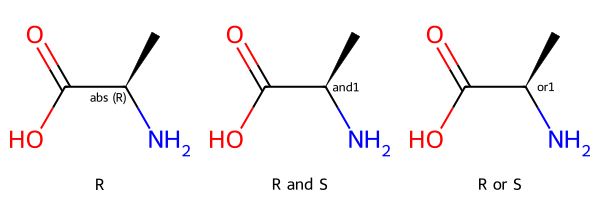

In [3]:
m_ccw_abs = Chem.MolFromSmiles('N[C@H](C)C(=O)O |a:1|')
m_and = Chem.MolFromSmiles('N[C@H](C)C(=O)O |&1:1|')
m_or = Chem.MolFromSmiles('N[C@H](C)C(=O)O |o1:1|')
Draw.MolsToGridImage([m_ccw_abs,m_and,m_or],legends=['R', 'R and S','R or S'])

Let's look at the AND example:

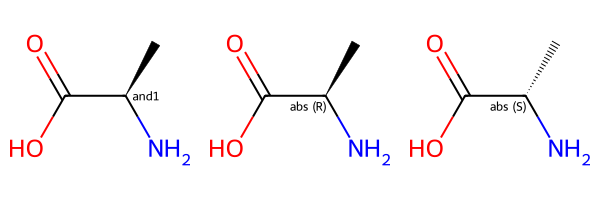

In [4]:
m_and = Chem.MolFromSmiles('N[C@H](C)C(=O)O |&1:1|')
m_and_1 = Chem.MolFromSmiles('N[C@H](C)C(=O)O |a:1|')
m_and_2 = Chem.MolFromSmiles('N[C@@H](C)C(=O)O |a:1|')
Draw.MolsToGridImage([m_and,m_and_1,m_and_2])

Here the first entry shows the molecule with stereo group while the second two entries show the two molecules contained in that mixture. If we used an OR stereo group instead of AND we'd be describing a sample with one of the two stereoisomers.

# Multiple stereocenters

Stereo groups are even more useful if there are multiple chiral centers since they allow us to express relative stereochemistry.

We'll use this molecule with two chiral centers as an example: 

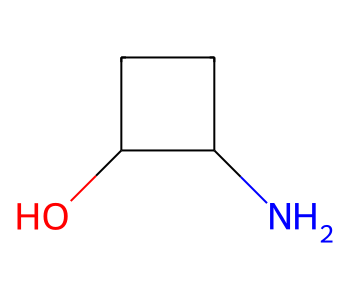

In [5]:
m = Chem.MolFromSmiles('OC1CCC1N')
m

We can obviously have examples of this where one or both chiral centers are fully specified, just as we saw above, but using stereo groups lets us do something new: express that the relative stereochemistry of the two centers is known:

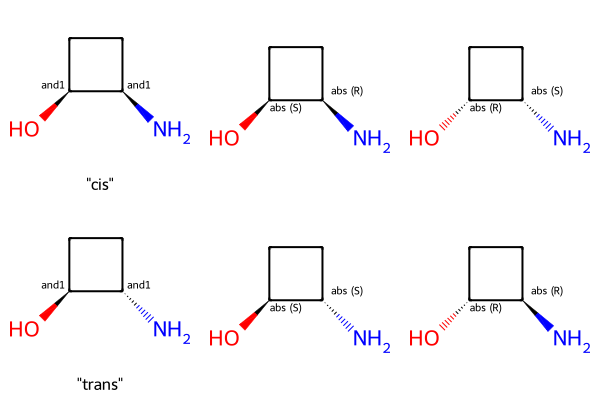

In [6]:
m2_cis = Chem.MolFromSmiles('O[C@H]1CC[C@H]1N |&1:1,4|')
m2_cis_1 = Chem.MolFromSmiles('O[C@H]1CC[C@H]1N |a:1,4|')
m2_cis_2 = Chem.MolFromSmiles('O[C@@H]1CC[C@@H]1N |a:1,4|')

m2_trans = Chem.MolFromSmiles('O[C@H]1CC[C@@H]1N |&1:1,4|')
m2_trans_1 = Chem.MolFromSmiles('O[C@H]1CC[C@@H]1N |a:1,4|')
m2_trans_2 = Chem.MolFromSmiles('O[C@@H]1CC[C@H]1N |a:1,4|')

Draw.MolsToGridImage([m2_cis,m2_cis_1,m2_cis_2,m2_trans,m2_trans_1,m2_trans_2],legends=['"cis"','','','"trans"','',''],molsPerRow=3)

In each row above the first entry shows the molecule with stereo groups while the second two entries show the two molecules contained in the mixture that representation describes.

# A slightly more complicated example

Here we'll invent some enhanced stereo information for this molecule from ChEMBL:

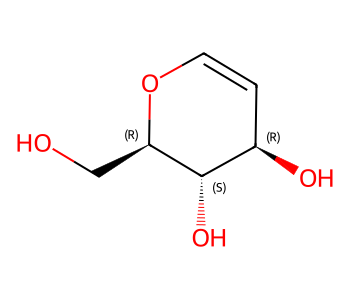

In [7]:
m = Chem.MolFromSmiles('OC[C@H]1OC=C[C@@H](O)[C@@H]1O') # CHEMBL2115567
m

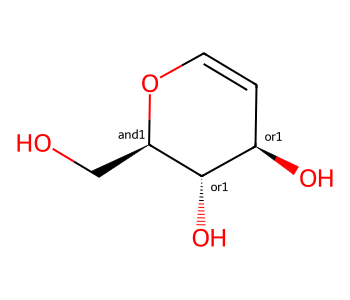

In [8]:
three_centers = Chem.MolFromSmiles('OC[C@H]1OC=C[C@@H](O)[C@@H]1O |&1:2,o2:6,8|') 
three_centers

There are both "and" and "or" groups present, so this represents one of two mixtures.

We have a mixture which contains either these two molecules:

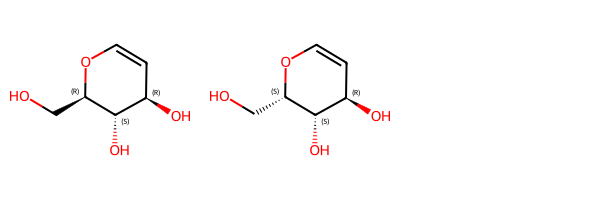

In [9]:
mix1_1 = Chem.MolFromSmiles('OC[C@H]1OC=C[C@@H](O)[C@@H]1O') 
mix1_2 = Chem.MolFromSmiles('OC[C@@H]1OC=C[C@@H](O)[C@@H]1O') 
Draw.MolsToGridImage([mix1_1,mix1_2])

or these two molecules:

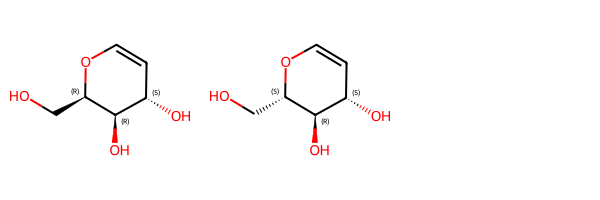

In [10]:
mix2_1 = Chem.MolFromSmiles('OC[C@H]1OC=C[C@H](O)[C@H]1O') 
mix2_2 = Chem.MolFromSmiles('OC[C@@H]1OC=C[C@H](O)[C@H]1O') 
Draw.MolsToGridImage([mix2_1,mix2_2])

# Enumerating stereo groups

The RDKit's stereoisomer enumeration code can take stereo groups into account. This is a useful way to see all of the possible molecules encoded in a structure with stereo groups.

In [11]:
from rdkit.Chem import EnumerateStereoisomers

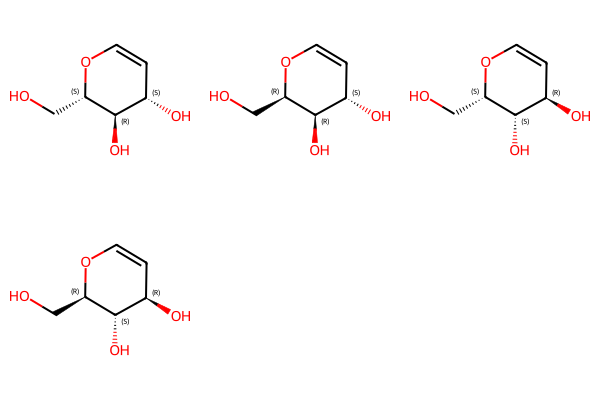

In [12]:
opts = EnumerateStereoisomers.StereoEnumerationOptions()
opts.onlyStereoGroups = True
enumerated = EnumerateStereoisomers.EnumerateStereoisomers(three_centers)
Draw.MolsToGridImage(list(enumerated))

Note that `EnumerateStereoisomers()` currently has no way of indicating AND and OR relationships, so we see all stereoisomers which could be present.

# Stereo groups and canonicalization

These four representations all describe the same thing:

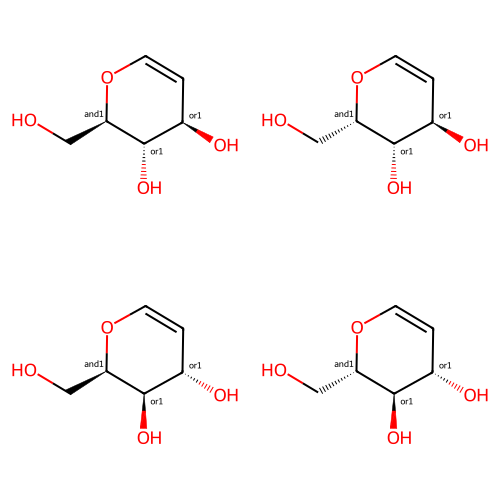

In [13]:
m1 = Chem.MolFromSmiles('OC[C@H]1OC=C[C@@H](O)[C@@H]1O |&1:2,o2:6,8|') 
m2 = Chem.MolFromSmiles('OC[C@@H]1OC=C[C@@H](O)[C@@H]1O |&1:2,o2:6,8|') 
m3 = Chem.MolFromSmiles('OC[C@H]1OC=C[C@H](O)[C@H]1O |&1:2,o2:6,8|') 
m4 = Chem.MolFromSmiles('OC[C@@H]1OC=C[C@H](O)[C@H]1O |&1:2,o2:6,8|') 

Draw.MolsToGridImage([m1,m2,m3,m4],molsPerRow=2,subImgSize=(250,250))

We see that when we generate canonical CXSMILES for the molecules:

In [14]:
for m in (m1,m2,m3,m4):
    print(Chem.MolToCXSmiles(m))

OC[C@H]1OC=C[C@H](O)[C@H]1O |o1:6,8,&1:2|
OC[C@H]1OC=C[C@H](O)[C@H]1O |o1:6,8,&1:2|
OC[C@H]1OC=C[C@H](O)[C@H]1O |o1:6,8,&1:2|
OC[C@H]1OC=C[C@H](O)[C@H]1O |o1:6,8,&1:2|


Note that this *not* true if we generate standard canonical SMILES for the molecule:

In [15]:
for m in (m1,m2,m3,m4):
    print(Chem.MolToSmiles(m))

OC[C@H]1OC=C[C@@H](O)[C@@H]1O
OC[C@@H]1OC=C[C@@H](O)[C@@H]1O
OC[C@H]1OC=C[C@H](O)[C@H]1O
OC[C@@H]1OC=C[C@H](O)[C@H]1O


This is a bit confusing at first. The reasoning behind the behavior is that the stereo groups should not be used in the canonicalization since no information about them will be included in the output.

# Creating your own stereo groups

You can also add your own stereo groups to molecules:

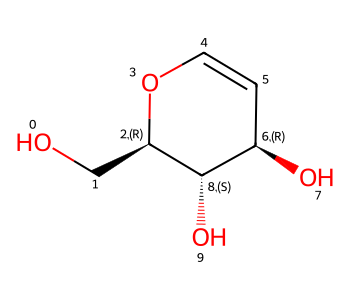

In [16]:
m = Chem.MolFromSmiles('OC[C@H]1OC=C[C@@H](O)[C@@H]1O') # CHEMBL2115567
IPythonConsole.drawOptions.addAtomIndices = True
m

In [17]:
IPythonConsole.drawOptions.addAtomIndices = False

The function to do this is `CreateStereoGroup()`:

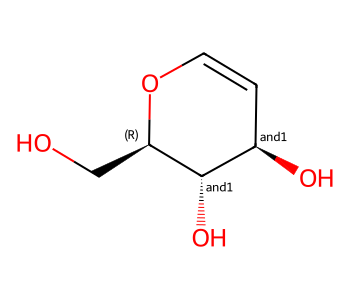

In [18]:
sgmol = Chem.RWMol(m)
sg = Chem.CreateStereoGroup(Chem.StereoGroupType.STEREO_AND, sgmol, [6,8])
sgmol.SetStereoGroups([sg])
sgmol